In [1]:
import numpy as np
import matplotlib.pyplot as plt



In [9]:
entropies = []
for red in range(10):
    blue = 9 - red
    balls = ["blue"] * blue + ["red"]*red
    items,count = np.unique(balls,return_counts=True)
    prob = count/np.sum(count)
    entropy = -np.sum(prob*np.log(prob))
    entropies.append(entropy)

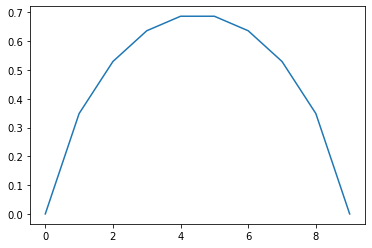

In [10]:
plt.plot(entropies)